In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np


In [2]:
data = pd.read_csv('train.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Text(0, 0.5, 'Number of passengers')

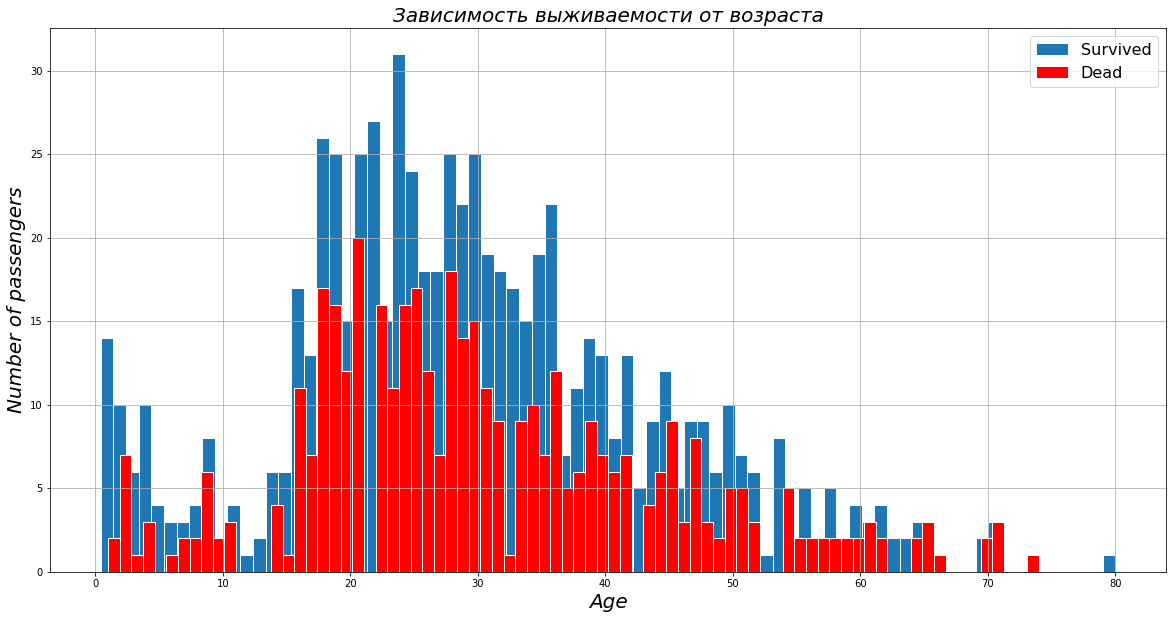

In [373]:
# Гипотеза 1 (смертность от возраста)
ax = data.Age.hist(figsize = (20,10), bins = 80, grid = True,edgecolor= 'white')
data[data['Survived'] == 0]['Age'].hist(figsize = (20,10),bins = 80,edgecolor= 'white',color = 'red')
ax.legend(['Survived', 'Dead'], prop  = {'size':16})
ax.set_title('Зависимость выживаемости от возраста', fontsize = 20, fontstyle = 'italic')
             
ax.set_xlabel('Age', size = 20, fontstyle = 'italic')
ax.set_ylabel('Number of passengers',fontstyle = 'italic', fontsize = 20)


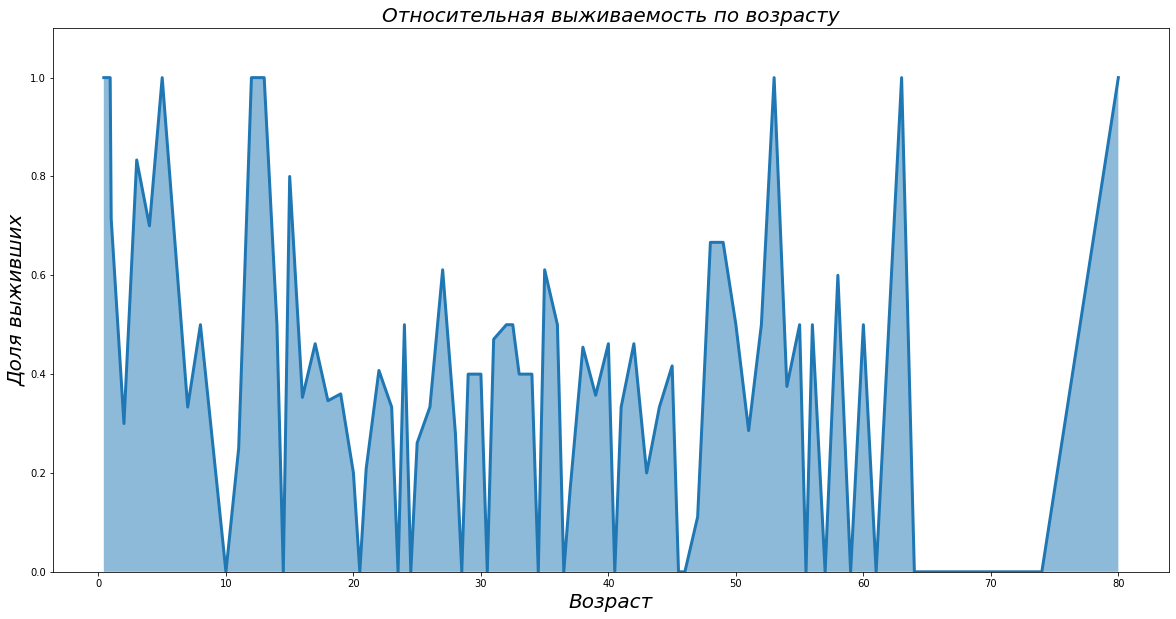

In [378]:
ts = (data.groupby(['Age'])['Survived'].sum() / data.groupby(['Age'])['Survived'].count())
ax = (data.groupby(['Age'])['Survived'].sum() / data.groupby(['Age'])['Survived'].count()).plot(figsize = (20,10),linewidth = 3)
ax.set_xlabel('Возраст', size = 20, fontstyle ='italic')
ax.set_ylabel('Доля выживших',size = 20, fontstyle ='italic' )
ax.set_title('Относительная выживаемость по возрасту',size = 20, fontstyle ='italic'  )
ax.set_ylim(0,1.1)
ax.fill_between(ts.index, ts, alpha = 0.5)

Text(0.5, 1.0, 'Смертность от пола')

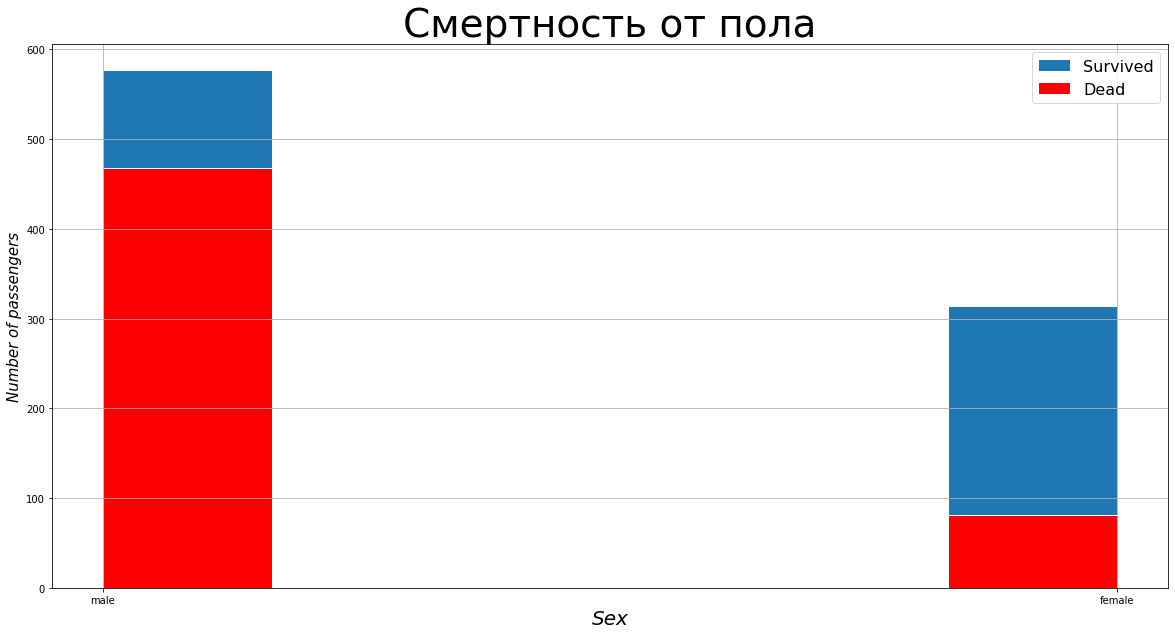

In [377]:
# Гипотеза 2 (смертность и пол)
ax = data.Sex.hist(figsize = (20,10), bins = 6, grid = True,edgecolor= 'white')
data[data['Survived'] == 0]['Sex'].hist(figsize = (20,10),bins = 6,edgecolor = 'white',color = 'red')
ax.legend(['Survived', 'Dead'], prop  = {'size':16})
ax.set_xlabel('Sex', size = 20, fontstyle = 'italic')
ax.set_ylabel('Number of passengers',fontstyle = 'italic',fontsize = 15)
ax.set_title('Смертность от пола', fontsize = 39)


# Исходя из графика,можем сделать вывод, что выживаемость пассажиров на борту зависела от Пола

Text(0, 0.5, 'Number of passengers')

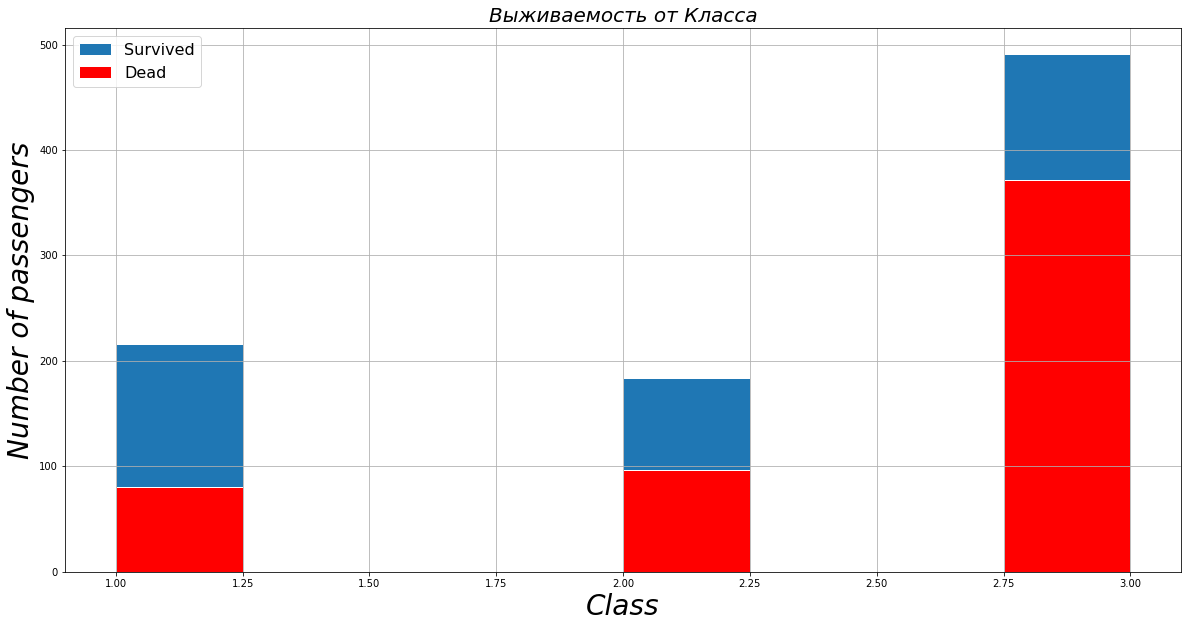

In [376]:
# Гипотеза 3 (Класс и смертность)
ax = data.Pclass.hist(figsize = (20,10), bins = 8, grid = True,edgecolor= 'white')
data[data['Survived'] == 0]['Pclass'].hist(figsize = (20,10),bins = 8,edgecolor= 'white',color = 'red')
ax.legend(['Survived', 'Dead'], prop  = {'size':16})
ax.set_title('Выживаемость от Класса',fontstyle = 'italic',fontsize = 20)
ax.set_xlabel('Class', size = 28, fontstyle = 'italic')
ax.set_ylabel('Number of passengers',fontstyle = 'italic', fontsize = 28)




# Исходя из графика,можем сделать вывод, что выживаемость пассажиров на борту зависела от класса

In [12]:
import mpl_toolkits.mplot3d.axes3d as p3

In [17]:
Sgate = data[(data['Embarked'] == 'S') & (data['Survived'] == 1)]['Survived'].count()/data[data['Embarked'] == 'S']['Survived'].count()
Qgate = data[data['Embarked'] == 'Q']['Survived'].sum()/data[data['Embarked'] == 'Q']['Survived'].count()
Cgate = data[data['Embarked'] == 'C']['Survived'].sum()/data[data['Embarked'] == 'Q']['Survived'].count()


Text(0.5, 1.0, 'Survived vs Entrance')

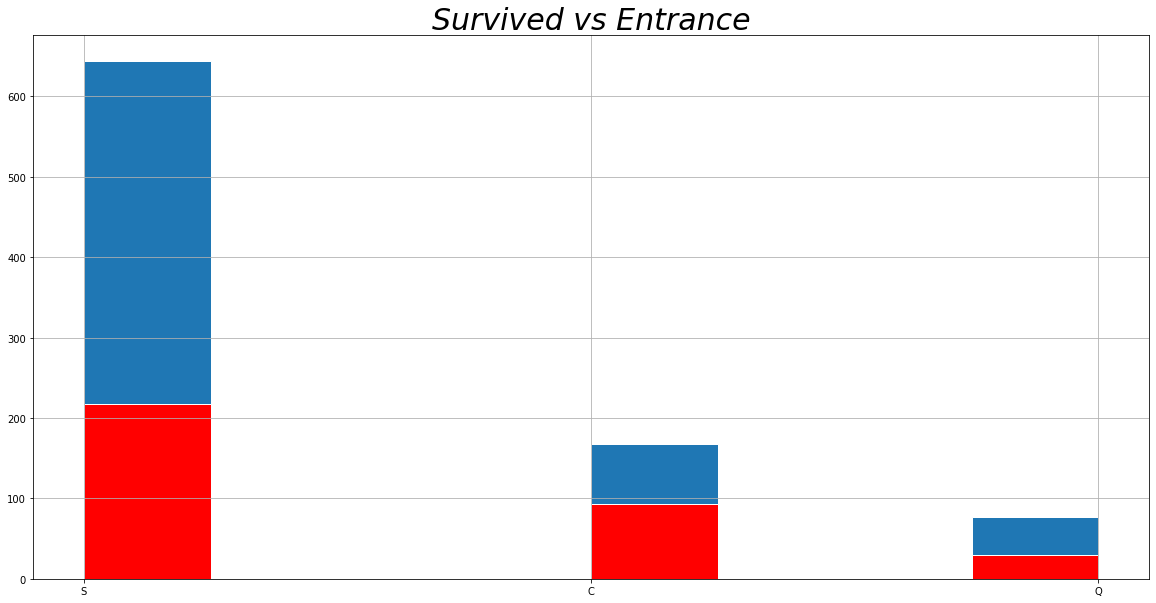

In [18]:
# Зависимость выживаемости от входа
ax = data.Embarked.hist(figsize = (20,10), bins = 8, grid = True,edgecolor= 'white')
data[data['Survived'] == 1]['Embarked'].hist(figsize = (20,10), bins = 8, grid = True,edgecolor= 'white', color = 'red')
ax.set_title('Survived vs Entrance', fontsize = 30, fontstyle = 'italic')

In [102]:
data['Family'] = data.SibSp + data.Parch


Text(0.5, 1.0, 'Зависимость выживаемости от кол-ва родственников на корабле')

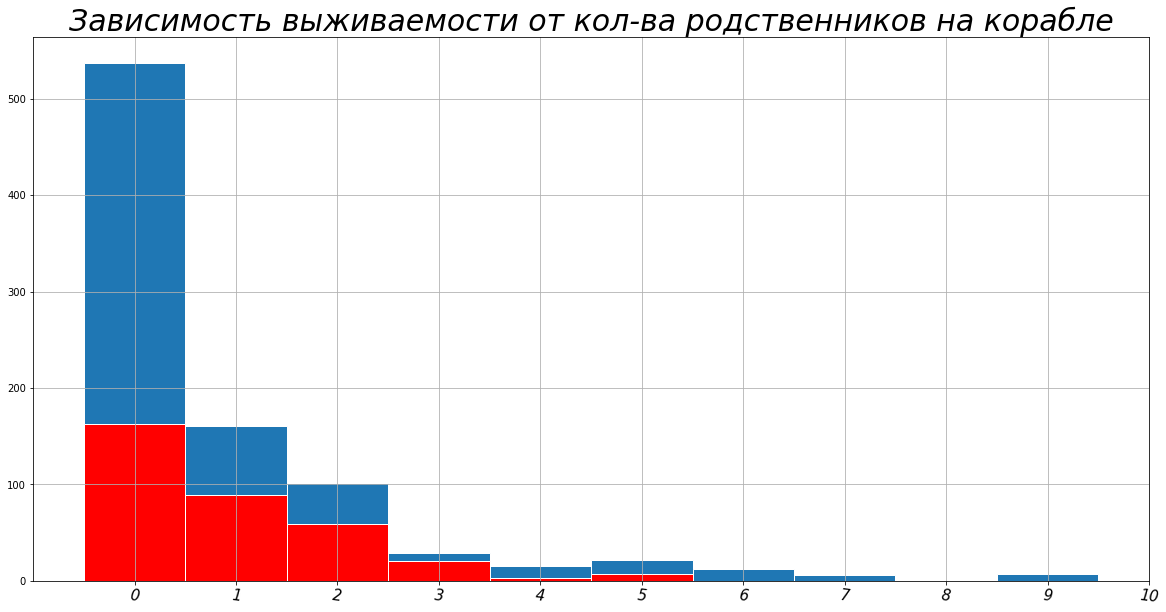

In [106]:
ax = data['Family'].hist(figsize = (20,10), bins = 10, grid =True, edgecolor = 'white')
data[data['Survived'] == 1]['Family'].hist(figsize = (20,10), bins = 6, grid =True, edgecolor = 'white', color = 'red')
ax.set_xticks([0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5,10.5])
ax.set_xticklabels([0,1,2,3,4,5,6,7,8,9,10], fontsize = 15, fontstyle = 'italic', rotation = -6)
ax.set_title('Зависимость выживаемости от кол-ва родственников на корабле', fontsize = 30, fontstyle = 'italic')

In [23]:
data.groupby(['Family'])['Survived'].sum()

Family
0     163
1      89
2      59
3      21
4       3
5       3
6       4
7       0
10      0
Name: Survived, dtype: int64

In [25]:
data['CabinGroup'] = data.Cabin.apply(lambda x:pd.Series(str(x)[0]))


In [26]:
data['CabinGroup'] = data['CabinGroup'].replace({'n':np.nan})
data['CabinGroup'].sort_values()

475      A
174      A
209      A
445      A
647      A
      ... 
884    NaN
885    NaN
886    NaN
888    NaN
890    NaN
Name: CabinGroup, Length: 891, dtype: object

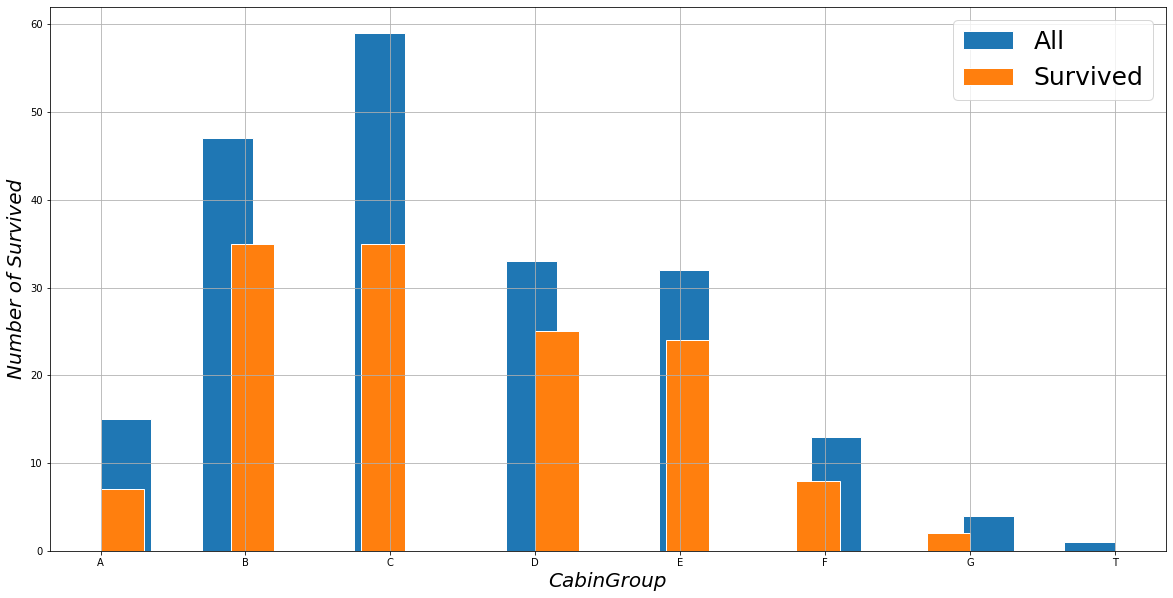

In [491]:
ax = data['CabinGroup'].sort_values().hist(figsize = (20,10), bins = 20, grid = True,edgecolor= 'white')
data[data['Survived'] == 1]['CabinGroup'].sort_values().hist(figsize = (20,10), bins = 20, grid = True,edgecolor= 'white')
ax.set_xlabel('CabinGroup', fontsize = 20, fontstyle = 'italic')
ax.set_ylabel('Number of Survived', fontsize = 20, fontstyle = 'italic')
ax.legend(['All', 'Survived'], prop  = {'size':25})


In [309]:
data1

,Pclass,CabinGroup,Survived
,,,sum
0,1,A,7
1,1,B,35
2,1,C,35
3,1,D,22
4,1,E,18
5,1,T,0
6,2,D,3
7,2,E,3
8,2,F,7


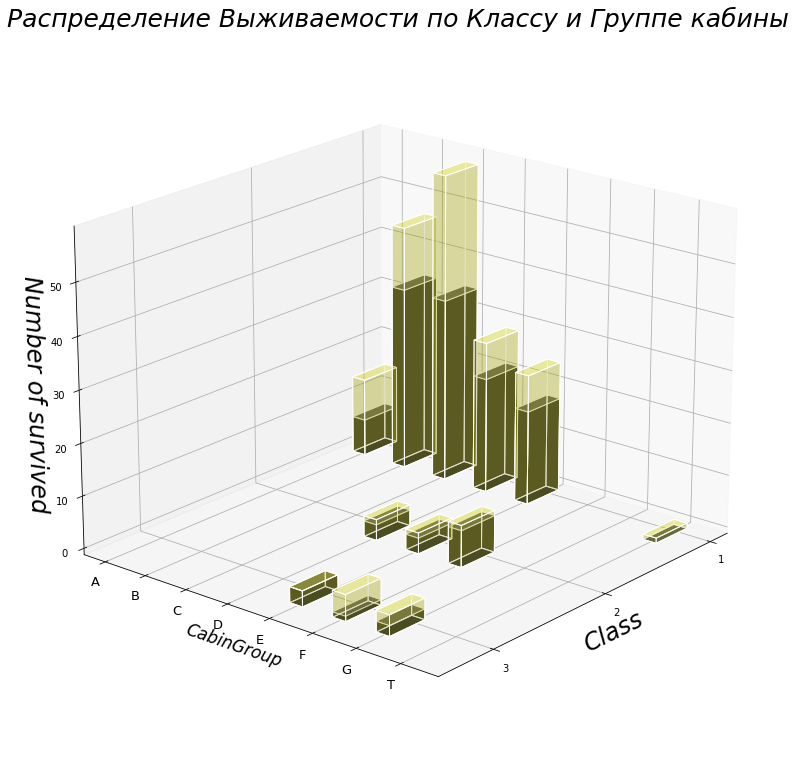

In [502]:
data1 = data.groupby(['Pclass', 'CabinGroup'], as_index = False).aggregate({'Survived':['sum']})
data2 = data.groupby(['Pclass', 'CabinGroup'], as_index = False).aggregate({'Survived':['count']})



X = data1['Pclass'].values
Y = data1['CabinGroup'].values
Z1 = np.ravel(data1['Survived'].values)
Z2 = np.ravel(data2['Survived'].values)


Y[Y == 'A']= 1
Y[Y == 'B']= 2
Y[Y == 'C']= 3
Y[Y == 'D']= 4
Y[Y == 'E']= 5
Y[Y == 'F']= 6
Y[Y == 'G']= 7
Y[Y == 'T']= 8


bottom1 = np.zeros_like(X) #нулевая матрица
fig = plt.figure(figsize = (20,10))
ax = p3.Axes3D(fig)
ax.set_title('Распределение Выживаемости по Классу и Группе кабины', fontsize = 25, fontstyle = 'italic')
ax.bar3d(X,Y,bottom1,0.3,0.3,Z1, edgecolor = 'white', color = 'grey')
ax.bar3d(X,Y,bottom1,0.3,0.3,Z2, edgecolor = 'white', color = 'yellow', alpha = 0.2)

ax.set_xlabel('Class',fontstyle = 'italic', fontsize = 24)
ax.set_ylabel('CabinGroup',fontstyle = 'italic', fontsize = 17)
ax.set_zlabel('Number of survived',fontstyle = 'italic', fontsize = 24, verticalalignment = 'bottom')
ax.set_xticks(np.array([1,2,3]))
ax.set_yticks(np.unique(Y))
ax.set_yticklabels(['A','B','C','D','E','F','G','T'], fontsize = 13)
ax.view_init(20, 40)


In [321]:
data['AgeInt'] = pd.cut(data['Age'], 10)
data['FareInt'] = pd.cut(data['Fare'], 10)
datan = data.groupby(['AgeInt', 'FareInt']).aggregate({'Survived':'mean'}).replace({np.nan:0}).reset_index()
datan['Survived']  = np.round(datan['Survived'] * 100)

datan

,AgeInt,FareInt,Survived
0,"(0.34, 8.378]","(-0.512, 51.233]",67.0
1,"(0.34, 8.378]","(51.233, 102.466]",100.0
2,"(0.34, 8.378]","(102.466, 153.699]",50.0
3,"(0.34, 8.378]","(153.699, 204.932]",0.0
4,"(0.34, 8.378]","(204.932, 256.165]",0.0
...,...,...,...
95,"(72.042, 80.0]","(256.165, 307.398]",0.0
96,"(72.042, 80.0]","(307.398, 358.63]",0.0
97,"(72.042, 80.0]","(358.63, 409.863]",0.0
98,"(72.042, 80.0]","(409.863, 461.096]",0.0


In [332]:
Xax = np.arange(0,10)
Yax = np.arange(0, 10)
Yax,Xax = np.meshgrid(Xax,Yax)
Xax = np.ravel(Xax)
Yax = np.ravel(Yax)
Zax = datan['Survived'].values
a = np.where(Zax == 0)
Xax = np.delete(Xax, a)
Yax = np.delete(Yax, a)
Zax = np.delete(Zax, a)

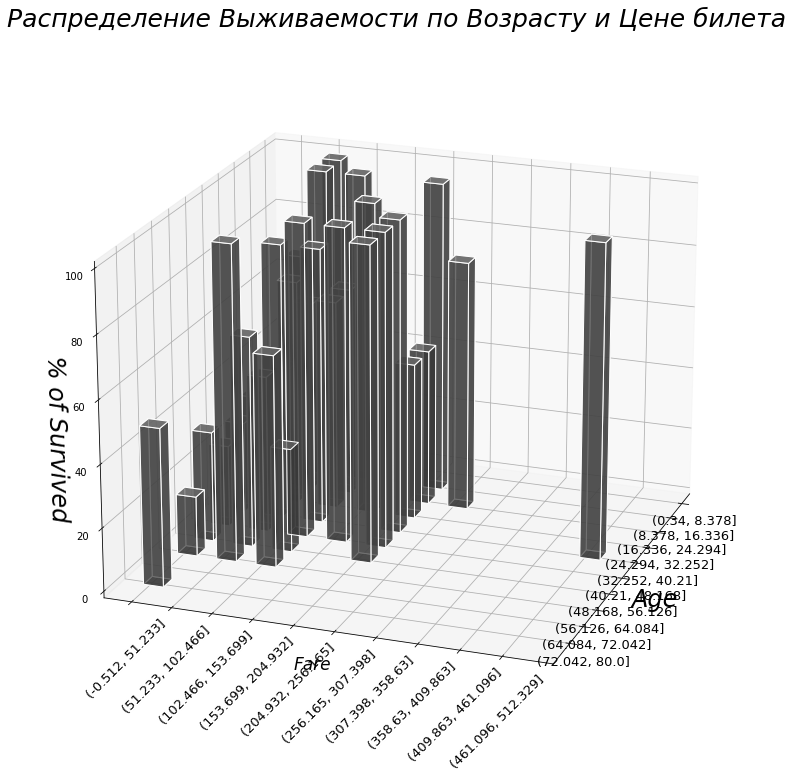

In [481]:
bottom1 = np.zeros_like(Xax) #нулевая матрица
fig = plt.figure(figsize = (20,10))
ax = p3.Axes3D(fig)
ax.set_title('Распределение Выживаемости по Возрасту и Цене билета', fontsize = 25, fontstyle = 'italic')
ax.bar3d(Xax,Yax,bottom1,0.5,0.5,Zax, edgecolor = 'white', color = 'grey', alpha =0.7)

ax.set_xlabel('Age',fontstyle = 'italic', fontsize = 24)
ax.set_ylabel('Fare',fontstyle = 'italic', fontsize = 17)
ax.set_zlabel('% of Survived',fontstyle = 'italic', fontsize = 24, verticalalignment = 'bottom')
ax.set_xticks(np.arange(0,10))
ax.set_yticks(np.arange(0,10))
ax.set_xticklabels(np.unique(datan['AgeInt']), fontsize = 13, rotation = 0, position = (0,0))
ax.set_yticklabels(np.unique(datan['FareInt']), fontsize = 13, rotation  = 45)
ax.view_init(20,20)

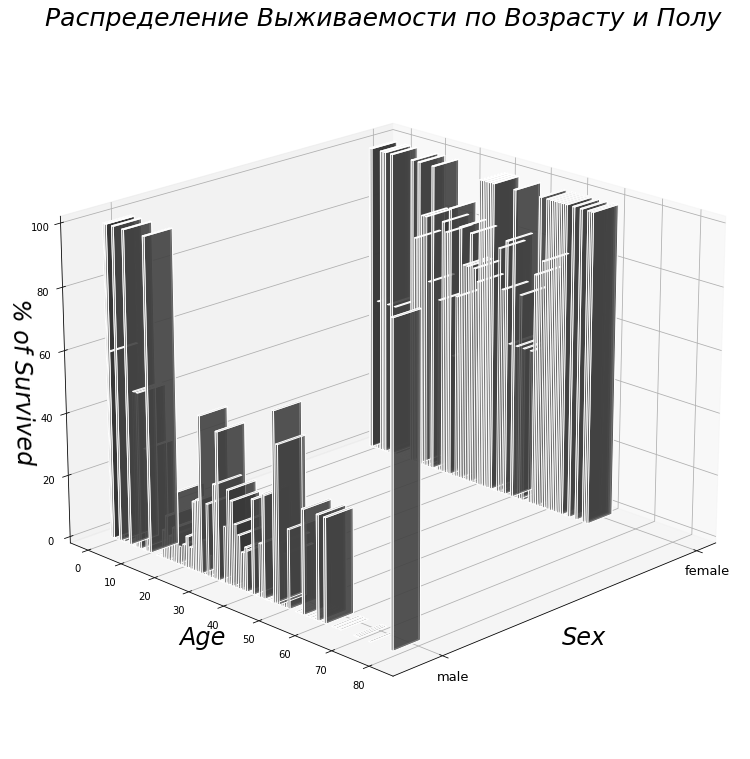

In [472]:
dataAgeSex = data.groupby(['Age', 'Sex'], as_index = False).agg({'Survived' : 'mean'})

dataAgeSex['Survived'] = np.round(dataAgeSex['Survived'].values * 100)
dataAgeSex = dataAgeSex.sort_values(['Sex'])


 
fig = plt.figure(figsize = (20,10))
ax = p3.Axes3D(fig)
ax.set_title('Распределение Выживаемости по Возрасту и Полу', fontsize = 25, fontstyle = 'italic')
ax.bar3d(dataAgeSex['Sex'].replace({'female':1, 'male':2}).values,
         dataAgeSex['Age'].values,
         np.zeros_like(dataAgeSex['Sex'].replace({'female':1, 'male':2}).values),
         0.1,0.5,dataAgeSex['Survived'].values,
         edgecolor = 'white', color = 'grey', alpha =0.7)

ax.set_xlabel('Sex',fontstyle = 'italic', fontsize = 24)
ax.set_ylabel('Age',fontstyle = 'italic', fontsize = 24)
ax.set_zlabel('% of Survived',fontstyle = 'italic', fontsize = 24, verticalalignment = 'bottom')

ax.set_xticks(np.array([1,2]))
ax.set_xticklabels(['female','male'], fontsize = 13, rotation = 0)
ax.view_init(20,45)

# Из графика можно сделать вывод,что шанс на выживание был выше у молодых и девушек

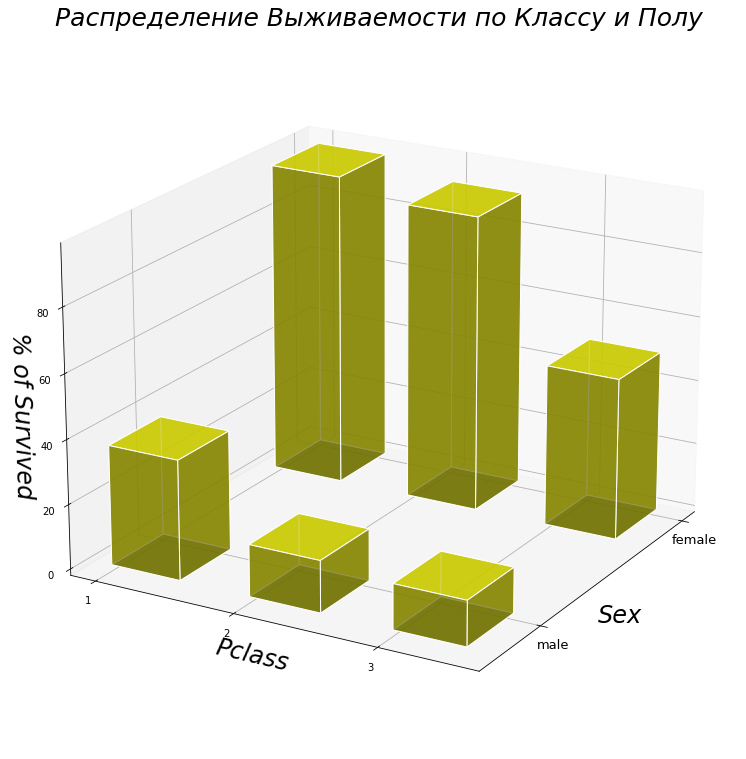

In [486]:
dataSexPclass = data.groupby(['Sex', 'Pclass'], as_index = False).agg({'Survived': 'mean'})
dataSexPclass['Survived'] = np.round(dataSexPclass['Survived'].values * 100)


fig = plt.figure(figsize = (20,10))
ax = p3.Axes3D(fig)
ax.set_title('Распределение Выживаемости по Классу и Полу', fontsize = 25, fontstyle = 'italic')
ax.bar3d(dataSexPclass['Sex'].replace({'female':1, 'male':2}).values,
         dataSexPclass['Pclass'].values,
         np.zeros_like(dataSexPclass['Sex'].replace({'female':1, 'male':2}).values),
         0.3,0.5,dataSexPclass['Survived'].values,
         edgecolor = 'white', color = 'yellow', alpha =0.7)
ax.set_xlabel('Sex',fontstyle = 'italic', fontsize = 24)
ax.set_ylabel('Pclass',fontstyle = 'italic', fontsize = 24)
ax.set_zlabel('% of Survived',fontstyle = 'italic', fontsize = 24, verticalalignment = 'bottom')

ax.set_xticks(np.array([1,2]))
ax.set_yticks(np.array([1,2,3]))
ax.set_xticklabels(['female','male'], fontsize = 13, rotation = 0)
ax.view_init(20,30)


#Опять таки можно видеть сильную разницу выживаемости мужчин и женщин. Также есть зависимость выживаемости от класса
